# **Simple Bigram Model Demo**

The `Bigram` class represent a simple bigram model which looks at all combinations of two letters in the alphabet and evaluates how likely one occurs after the other. Based on this probability distribution a characters are sample one at a time to make new words. A special character (in this case the full stop character `.`) is used to denote the start and end of a word. 

As the model can only predict single words (opposed to full sentences), this model is best used for producing names. As can be seen below, the model's performance is quite poor, at best the generated names sound similar to names but are not real names, at worst it is just pure gibberish. Nevertheless a simple Bigram model is a good starting point for a generative AI model and provides a solid reference point. 


In [1]:
from bigram import Bigram

The model expects the training data to be in the form of a list of words, the special character `.` is added automatically during training and does not need to be added to the training data by the user. 

In [2]:
with open('names.txt', 'r') as file:
    words = file.read().splitlines()

model = Bigram(seed=69)
model.train(train_data=words)

words[:5]  # first 5 names in training data

['emma', 'olivia', 'ava', 'isabella', 'sophia']

The `Bigram` class has a built in function to visualize all of the bigrams and their frequency of occurance in the `train_data`

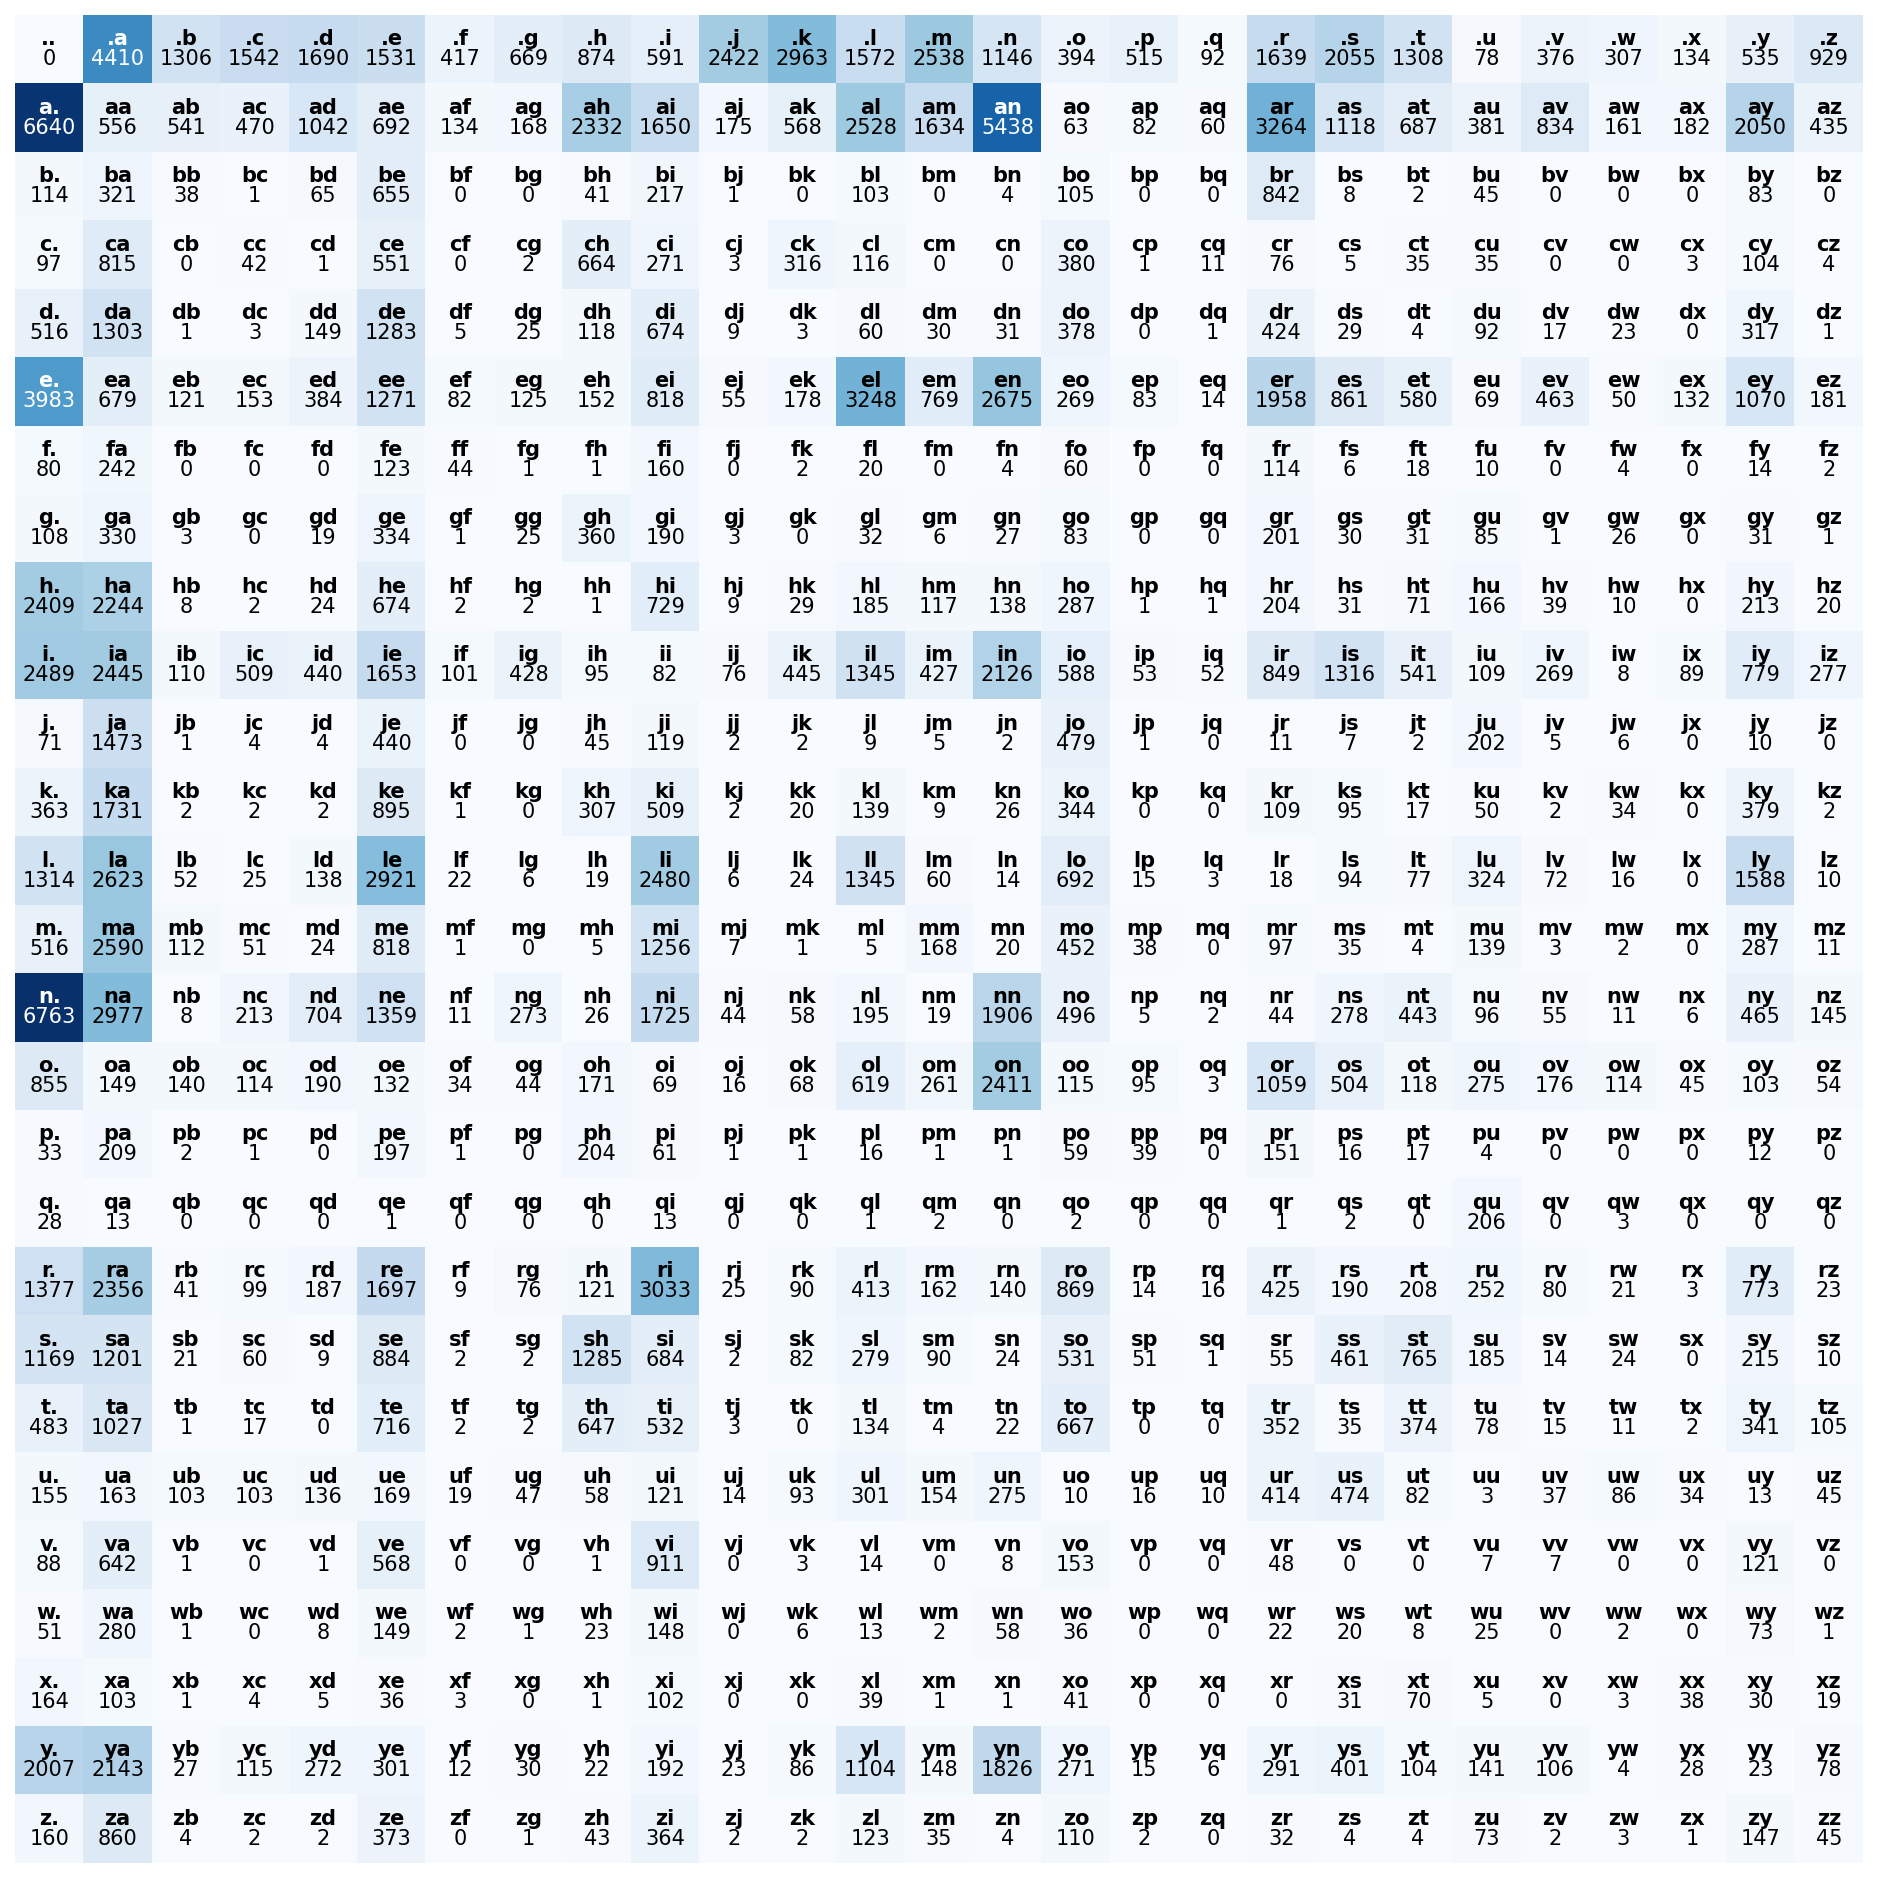

In [3]:
model.visualize_bigrams_count()

The model can generate a single word, or multiple words

In [4]:
model.generate_word()

'za'

In [5]:
generated_words = model.generate_words(n_words=10)
generated_words

['yselerajantziconsramome',
 'yaury',
 'kiakiarovi',
 'janazali',
 'josion',
 'imimigemane',
 'h',
 'danyucoca',
 'eeqfy',
 'julan']

A set of data can be evaluated using the *Maximum Liklihood Estimation* method. The likelihood is simply the probability of a word belonging to the training_data set. The probability of each bigram of occuring is used to generate a new set of words. These same probabilities can be used to determine how likely it is that a given word (specifically its bigrams) belong to the training dataset. 

$$ \mathcal{L} = \prod p_{bigram} $$

In machine learning it is preferrable to have a cost function that is in the form of a sum of linear terms, instead of a product like the likelihood. For this reason the log of the likelihood is taken, as the log of a product of two items is the same as the sum of the logs of two items. 

$$ \ln (a \cdot b) = \ln(a) + \ln(b) $$

Furthermore the cost function $J$ should range between 0 and positive infinity, with a lower value indicating better performance. For this reason the cost function is defined as the negative log likelihood. 

$$ J = - \ln \mathcal{L}  $$

In [6]:
model.evaluate_words(generated_words)

2.5870134830474854

In [7]:
model.evaluate_words(words)

2.460574560967304